In [1]:
# apply Jupyter notebook style
from IPython.core.display import HTML

from custom.styles import style_string

HTML(style_string)

<div style="text-align:center;">
  <img src="custom/molssi_main_horizontal.png" style="display: block; margin: 0 auto; max-height:200px;">
</div>

Python Data Science Libraries - Pandas and Seaborn
===================================================

<div class="overview admonition"> 
<p class="admonition-title">Overview</p>

Questions:

* How can I use pandas to examine data?

* How can I use seaborn to visualize relationships?

Objectives:

* Learn the basics of pandas dataframes

* Use seaborn to make plots.

</div>


Pandas is a Python library used for data analysis and manipulation. Within the world of data science, it is a ubiquitous and widely used library. If you are learning how to analyze data in Python, it will be almost impossible to avoid pandas. 

Pandas is very powerful. In this session, we'll be learning how to access information in pandas dataframes and how to do some basic manipulation and analysis. The first step in using pandas is importing it. Typically when pandas is imported, it is shortened to `pd`.

In [2]:
import pandas as pd

The first data set we are looking at in this workshop is solubility data. 
This is a data set which gives molecular descriptors along with solubility calculated using the ESOL method. 
The data was obtained from [moleculenet](https://moleculenet.org/datasets-1).
The dataset has been downloaded and placed in your `data` folder.

<div class="note admonition"> 
<p class="admonition-title">The ESOL Dataset</p>

For this notebook and the next notebook, we will be working with a data set called ESOL.
ESOL is short for "estimated solubility". 
The data set originates [from a paper published in 2004 by John. S. Delaney](https://pubs.acs.org/doi/epdf/10.1021/ci034243x), 
where he used it to fit a model for estimated solubility of small molecules using a linear model.

In this notebook, we will not be analyzin the data too deeply. Instead, we will use it to get accquainted with the pandas data science library.

</div>

Later in the workshop, we'll be seing how we can fit this model ourselves using Python, but for now we are just going to examine the data using pandas. 
The data is saved in a csv file. CSV stands for "comma separated values". 
This is a file format where commas separate values. 
You can also typically read files like this into excel. 
In fact, initially in this session you may not yet see what advantages pandas offers over Excel. 
However, functionalites in pandas will be more useful once we start cleaning and fitting data.



In [3]:
df = pd.read_csv("data/delaney-processed.csv")

## Examining the data

Now that we have used the pandas `read_csv` function, our data is in a variable called `df`. This variable is a **pandas dataframe**. This means it has lots of special functionalities thanks to pandas. For example, you can preview the first 5 rows using the `.head` function.

In [4]:
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


The `.info` function will give information about the columns and the data type of those columns. The data type will become very important later as we work with more data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Compound ID                                      1128 non-null   object 
 1   ESOL predicted log solubility in mols per litre  1128 non-null   float64
 2   Minimum Degree                                   1128 non-null   int64  
 3   Molecular Weight                                 1128 non-null   float64
 4   Number of H-Bond Donors                          1128 non-null   int64  
 5   Number of Rings                                  1128 non-null   int64  
 6   Number of Rotatable Bonds                        1128 non-null   int64  
 7   Polar Surface Area                               1128 non-null   float64
 8   measured log solubility in mols per litre        1128 non-null   float64
 9   smiles                        

Pandas assigns data types to columns, and will do its best to decide the data column for each column based on what is in the column. 
You will see that this dataframe has `1128` values in each column. 

We see that the column `Minimum Degree` has the data type of `int64`. Here, `int` means `integer` and `64` means `64 bit`.  The `64 bit` refers to the amount of computer memory the variable can occupy. It won't really be important for us. Similarly, `float64` means `64 bit floating point`. These are decimal numbers.

The other column names which read `object` are not numeric. They might be strings or they might be something else. We'll discuss more later.

The `describe` function can be used on a dataframe to quickly see statistics about columns with numerical data. If you look at the columns that statistics are computed for and compare to the data type shown from `info`, you will see that we only get statistics for columns which had `int64` or `float64` data types.

In [6]:
df.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


## Accessing Data

One great thing about pandas dataframes is how easy it is to access information. Pandas allows you to access information in a dataframe using both data indexes and names.

Pandas dataframes have rows and columns, you can see how many rows and columns using `.shape`. This will return the shape as `(num_rows, num_columns)`.

In [7]:
df.shape

(1128, 10)

### Accessing with rows and column numbers 

#### The `.iloc` function
Access on a particular row and column using `.iloc` followed by square brackets and the row and column numbers you want to access. If you only put one number, it will be assumed to be the row number you want.

The following gets row number 35.

In [8]:
df.iloc[35]

Compound ID                                        Valeraldehyde
ESOL predicted log solubility in mols per litre           -1.103
Minimum Degree                                                 1
Molecular Weight                                          86.134
Number of H-Bond Donors                                        0
Number of Rings                                                0
Number of Rotatable Bonds                                      3
Polar Surface Area                                         17.07
measured log solubility in mols per litre                  -0.85
smiles                                                   CCCCC=O
Name: 35, dtype: object

We can also specify a number of columns by adding a second number to the slicing.

In [9]:
df.iloc[35, :3]

Compound ID                                        Valeraldehyde
ESOL predicted log solubility in mols per litre           -1.103
Minimum Degree                                                 1
Name: 35, dtype: object

### Accessing with names

Each dataframe has an index (rows) and columns. The rows and columns have names. For the columns, these are indicated in `.head` by the bold row at the top of the dataframe. The row names are similarly listed in bold in the left of the dataframe. The index can be named, but by default it is usually just numbered. 

You can see information about the index or the columns using `df.index` or `df.columns`.

In [10]:
df.index

RangeIndex(start=0, stop=1128, step=1)

In [11]:
df.columns

Index(['Compound ID', 'ESOL predicted log solubility in mols per litre',
       'Minimum Degree', 'Molecular Weight', 'Number of H-Bond Donors',
       'Number of Rings', 'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured log solubility in mols per litre', 'smiles'],
      dtype='object')

Some of these column names are very long, and we might not want to type them 
when we want to reference data. 
We will rename some of these columns to make accessing the data more convenient.

In [12]:
df.rename( columns = {
    "ESOL predicted log solubility in mols per litre": "ESOL solubility (mol/L)",
    "measured log solubility in mols per litre" : "measured solubility (mol/L)"
}, inplace=True)

To access part of a dataframe using the index or column names, would use the `loc` function.

Because our index names are just numbers, this doesn't look that different than `iloc` when we are accessing rows.

#### The `.loc` function

In [13]:
df.loc[35]

Compound ID                    Valeraldehyde
ESOL solubility (mol/L)               -1.103
Minimum Degree                             1
Molecular Weight                      86.134
Number of H-Bond Donors                    0
Number of Rings                            0
Number of Rotatable Bonds                  3
Polar Surface Area                     17.07
measured solubility (mol/L)            -0.85
smiles                               CCCCC=O
Name: 35, dtype: object

However, we can now use column names

In [14]:
df.loc[35, "smiles"]

'CCCCC=O'

#### Using column names

You can pull a column of several columns of information using the syntax

```python
df[column_name]
```

To pull several columns, do

```python
df[[colname1, colname2]]
```

For example

In [15]:
df["Compound ID"]

0            Amigdalin
1             Fenfuram
2               citral
3               Picene
4            Thiophene
             ...      
1123         halothane
1124            Oxamyl
1125         Thiometon
1126    2-Methylbutane
1127          Stirofos
Name: Compound ID, Length: 1128, dtype: object

In [16]:
df[["Compound ID", "smiles"]]

,Compound ID,smiles
0,Amigdalin,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,Cc1occc1C(=O)Nc2ccccc2
2,citral,CC(C)=CCCC(C)=CC(=O)
3,Picene,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,c1ccsc1
...,...,...
1123,halothane,FC(F)(F)C(Cl)Br
1124,Oxamyl,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,CCC(C)C


## Filtering Data

There are two ways filtering in dataframes are typically done. Both are shown here for completeness, and because you will see both when looking at code others have written.

In the first method, the strategy is that you first establish where something is true within a dataframe, then use that to filter the dataframe.

In [17]:
df["Polar Surface Area"] >17

0        True
1        True
2        True
3       False
4       False
        ...  
1123    False
1124     True
1125     True
1126    False
1127     True
Name: Polar Surface Area, Length: 1128, dtype: bool

This gives us a list of values with either `True` or `False` that can be used to index into the dataframe.

In [18]:
df[df["Polar Surface Area"] > 17]

,Compound ID,ESOL solubility (mol/L),Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured solubility (mol/L),smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
7,Estradiol,-4.138,1,272.388,2,4,0,40.46,-5.030,CC12CCC3C(CCc4cc(O)ccc34)C2CCC1O
9,Rotenone,-5.246,1,394.423,0,5,3,63.22,-4.420,COc5cc4OCC3Oc2c1CC(Oc1ccc2C(=O)C3c4cc5OC)C(C)=C
...,...,...,...,...,...,...,...,...,...,...
1121,Phthalonitrile,-1.717,1,128.134,0,1,0,47.58,-2.380,N#Cc1ccccc1C#N
1122,m-Nitrotoluene,-2.640,1,137.138,0,1,1,43.14,-2.440,Cc1cccc(c1)N(=O)=O
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC


## Sorting Data

Pandas allows you to easily sort data using the `sort_values` method. Inside of the function call you list the column you would like to sort by. By default, the values will be sorted from lowest to highest (or `ascending`). This method will `return` a sorted dataframe.

In [19]:
df.sort_values("Number of H-Bond Donors")

,Compound ID,ESOL solubility (mol/L),Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured solubility (mol/L),smiles
652,Clomazone,-3.077,1,239.702,0,2,2,29.54,-2.338,CC1(C)CON(Cc2ccccc2Cl)C1=O
632,"1,5-Dimethlnapthalene",-4.147,1,156.228,0,2,0,0.00,-4.679,Cc1cccc2c(C)cccc12
634,Acenapthylene,-3.682,2,152.196,0,3,0,0.00,-3.960,C1=Cc2cccc3cccc1c23
635,Ethyl butyrate,-2.254,1,144.214,0,0,5,26.30,-1.280,CCCCCOC(=O)CC
637,Benzo(a)pyrene,-6.007,2,252.316,0,5,0,0.00,-8.699,c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45
...,...,...,...,...,...,...,...,...,...,...
276,Sorbitol,0.647,1,182.172,6,0,5,121.38,1.090,OCC(O)C(O)C(O)C(O)CO
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1025,Sucrose,0.310,1,342.297,8,2,5,189.53,0.790,OCC2OC(OC1(CO)OC(CO)C(O)C1O)C(O)C(O)C2O
441,Lactose,1.071,1,342.297,8,2,4,189.53,-0.244,OCC1OC(OC2C(O)C(O)C(O)OC2CO)C(O)C(O)C1O


If you include more than one column name, the dataframe will be sorted by multiple columns. First, it will be sorted by the first column indicated, then that sort will be sorted by the second. Consider the following examples. We first sort by `Number of H-Bond Donors`. Within that sort, we sort by `Molecular Weight`. 

In [20]:
df_sorted = df.sort_values(["Number of H-Bond Donors", "Molecular Weight"])
df_sorted.head()

,Compound ID,ESOL solubility (mol/L),Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured solubility (mol/L),smiles
934,Methane,-0.636,0,16.043,0,0,0,0.0,-0.90,C
953,Ethyne,-0.252,1,26.038,0,0,0,0.0,0.29,C#C
689,Ethylene,-0.815,1,28.054,0,0,0,0.0,-0.40,C=C
600,Ethane,-1.132,1,30.070,0,0,0,0.0,-1.36,CC
202,Propyne,-0.672,1,40.065,0,0,0,0.0,-0.41,CC#C


Note the bolded indices to the left of the dataframe. After we perform our sort, these are no longer in order. In the sorted dataframe, `loc` and `iloc` do not return the same values using the same number.

In [21]:
df_sorted.loc[934]

Compound ID                    Methane
ESOL solubility (mol/L)         -0.636
Minimum Degree                       0
Molecular Weight                16.043
Number of H-Bond Donors              0
Number of Rings                      0
Number of Rotatable Bonds            0
Polar Surface Area                 0.0
measured solubility (mol/L)       -0.9
smiles                               C
Name: 934, dtype: object

In [22]:
df_sorted.iloc[934]

Compound ID                                                   Bensulide
ESOL solubility (mol/L)                                           -4.99
Minimum Degree                                                        1
Molecular Weight                                                397.524
Number of H-Bond Donors                                               1
Number of Rings                                                       1
Number of Rotatable Bonds                                            10
Polar Surface Area                                                64.63
measured solubility (mol/L)                                        -4.2
smiles                         CC(C)OP(=S)(OC(C)C)SCCNS(=O)(=O)c1ccccc1
Name: 330, dtype: object

## Performing Operations on Multiple Cells

### Broadcasting

Pandas dataframes have the convenient feature that they use something called `broadcasting`. This means that if you are doing something like subtracting a number, multiplying, etc to a column or dataframe of information, it can be done all at once instead of with a `for` loop. Consider if we wanted to express the molecular surface area in $nm^2$ instead of Å$^2$. To do this, we would need to divide each value by 100.

Instead of writing a `for` loop that does this, we can just write the following code. This will return a pandas Series (one dimensional dataframe). 

In [23]:
df["Polar Surface Area"] / 100

0       2.0232
1       0.4224
2       0.1707
3       0.0000
4       0.0000
         ...  
1123    0.0000
1124    0.7100
1125    0.1846
1126    0.0000
1127    0.4476
Name: Polar Surface Area, Length: 1128, dtype: float64

To save it as a new column, we need to capture the output in a column. You can create a new column in a dataframe using the following syntax.

In [24]:
df["Polar Surface Area (nm^2)"] = df["Polar Surface Area"] / 100

You can also add, subtract, or multiply two columns with one another. For example, we might want to calculate the difference between the predicted and observed values for this solubility model.

In [25]:
df["ESOL solubility (mol/L)"] - df["measured solubility (mol/L)"]

0      -0.204
1       0.415
2      -0.519
3       1.252
4      -0.902
        ...  
1123   -0.898
1124   -1.014
1125   -0.232
1126    0.935
1127    0.202
Length: 1128, dtype: float64


<div class="exercise admonition">
<p class="admonition-title">Check Your Understanding</p>
<p>  Save the difference between the predicted and measured solubility in a column named "difference". </p>
</div>



In [26]:
df["difference"] = df["ESOL solubility (mol/L)"] - df["measured solubility (mol/L)"]

### The `.apply` method - for rows and columns

The apply method is used to apply a function to either the rows or columns of a dataframe.  If you use this on a single column, the function will be applied to every value.

In [27]:
df["Compound ID"].apply(len)

0        9
1        8
2        6
3        6
4        9
        ..
1123     9
1124     6
1125     9
1126    14
1127     8
Name: Compound ID, Length: 1128, dtype: int64

In [28]:
df[["smiles", "Compound ID"]].apply(len)

smiles         1128
Compound ID    1128
dtype: int64


<div class="exercise admonition">
<p class="admonition-title">Check Your Understanding</p>
<p>Some libraries from RDKit are imported below. PandasTools for RDKit will be fully explained in the next lesson. Use the apply function to apply Chem.MolFromSmiles to the smiles column of your dataframe. This will create a list of RDKit molecule objects. Save this in a new column called "molecule"</p>
</div>


In [30]:
from rdkit import Chem

from rdkit.Chem import PandasTools

PandasTools.RenderImagesInAllDataFrames(True)

In [31]:
# Your code here
df["molecule"] = df["smiles"].apply(Chem.MolFromSmiles)

,Compound ID,ESOL solubility (mol/L),Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured solubility (mol/L),smiles,Polar Surface Area (nm^2),difference,molecule
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,2.0232,-0.204,
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2,0.4224,0.415,
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O),0.1707,-0.519,
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,0.0000,1.252,
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1,0.0000,-0.902,

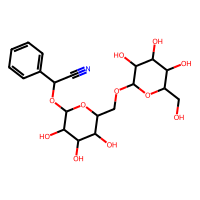
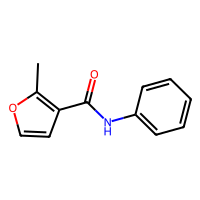
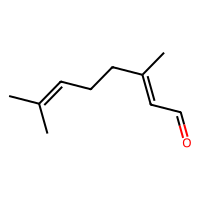
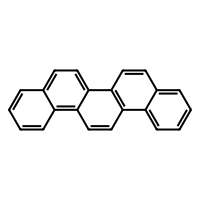
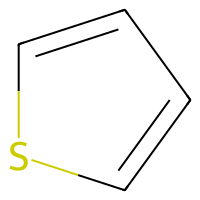

In [32]:
df.head()

## Visualization with seaborn

If you have programmed with Python before, you are probably familiar with the library matplotlib.
In this workshop, we will use a library called seaborn. 
Seaborn is built on top of matplotlib and is commoly used for statistical visualizations.

Seaborn [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) can be good for seeing linear relationships.
It will plot the data of interest with a linear regression.

<Axes: xlabel='Molecular Weight', ylabel='measured solubility (mol/L)'>

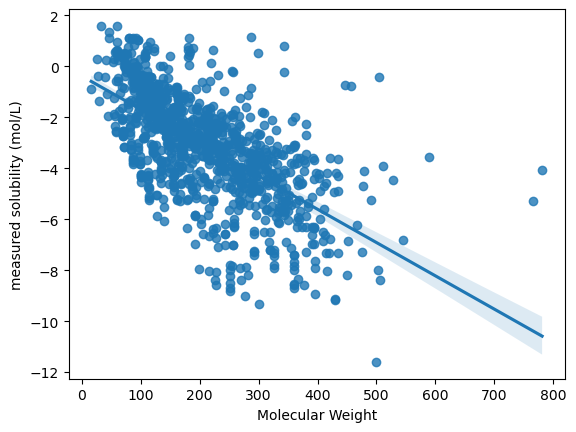

In [33]:
import seaborn as sns

sns.regplot(x="Molecular Weight", y="measured solubility (mol/L)", data=df)

We can also quickly get a glance at the relationship between variables using a pandas correlation matrix (`df.corr(numeric_only=True))`) and a seaborn heatmap.

<Axes: >

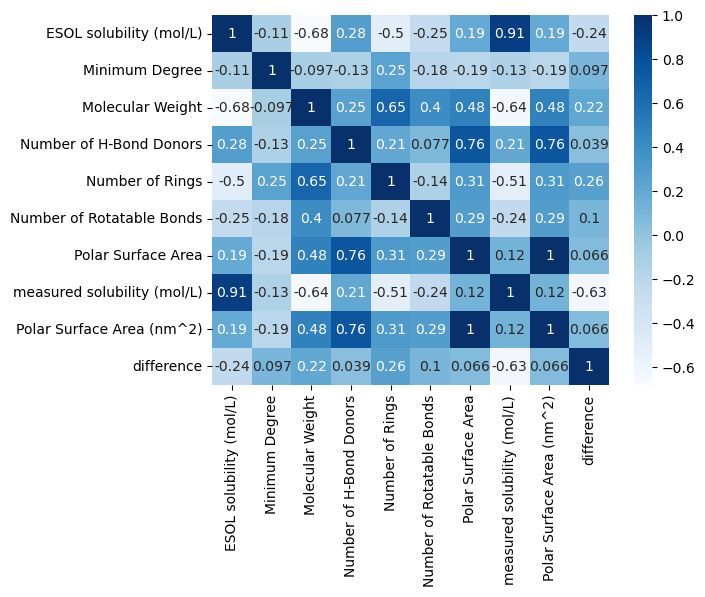

In [34]:
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True)

In [35]:
df.columns

Index(['Compound ID', 'ESOL solubility (mol/L)', 'Minimum Degree',
       'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings',
       'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured solubility (mol/L)', 'smiles', 'Polar Surface Area (nm^2)',
       'difference', 'molecule'],
      dtype='object')

It is common in data science to visualize the relationship of many variables to a quantity of interest by creating several linear plots. 
In these plots, the variable of interest is typically placed on the y-axis, while each of the other variables takes its turn on the x-axis. This approach allows for a clear view of individual relationships and easy comparison across different variables.

Usually, for this visualization, the data must be converted from "wide format"
to "long format".

#### 1. Wide Format

In the wide format, each row represents a compound, and each column represents a different attribute or measurement for that compound. This is typically the format that many might first encounter when looking at a spreadsheet or database table.

**Example:**

| Compound ID | Molecular Weight | LogP | Melting Point |
|-------------|------------------|------|---------------|
| C1          | 180.16           | 2.3  | 156°C         |
| C2          | 208.23           | 3.1  | 134°C         |
| C3          | 152.15           | 1.8  | 165°C         |

#### 2. Long Format

In the long format, each row represents a single measurement or attribute for a particular compound. Instead of having separate columns for each measurement, there are typically columns denoting the compound, the type of measurement, and the value.

**Example:**

| Compound ID | Measurement      | Value  |
|-------------|------------------|--------|
| C1          | Molecular Weight | 180.16 |
| C1          | LogP             | 2.3    |
| C1          | Melting Point    | 156°C  |
| C2          | Molecular Weight | 208.23 |
| C2          | LogP             | 3.1    |
| C2          | Melting Point    | 134°C  |
| C3          | Molecular Weight | 152.15 |
| C3          | LogP             | 1.8    |
| C3          | Melting Point    | 165°C  |


Seaborn and pandas are commonly used to create these plots quickly.
First, we must use pandas to transform our data to "long format" using `pd.melt`.
Long format, often referred to as "tidy" format, is a way of structuring a dataset where each row is an observation a

To get our data in long format, we will need to determine our variables of interest. Let's remind ourselves of our columns.nd each column is a variable.

In [36]:
df.columns

Index(['Compound ID', 'ESOL solubility (mol/L)', 'Minimum Degree',
       'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rings',
       'Number of Rotatable Bonds', 'Polar Surface Area',
       'measured solubility (mol/L)', 'smiles', 'Polar Surface Area (nm^2)',
       'difference', 'molecule'],
      dtype='object')

For this visualization, we will want only our numeric columns as values. We can use a pandas command to do this.

In [37]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

In [38]:
long_df = pd.melt(df, id_vars="measured solubility (mol/L)", value_vars=numeric_cols)
long_df.head()

,measured solubility (mol/L),variable,value
0,-0.77,ESOL solubility (mol/L),-0.974
1,-3.30,ESOL solubility (mol/L),-2.885
2,-2.06,ESOL solubility (mol/L),-2.579
3,-7.87,ESOL solubility (mol/L),-6.618
4,-1.33,ESOL solubility (mol/L),-2.232


/home/janash/miniconda3/envs/acs-workshop/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


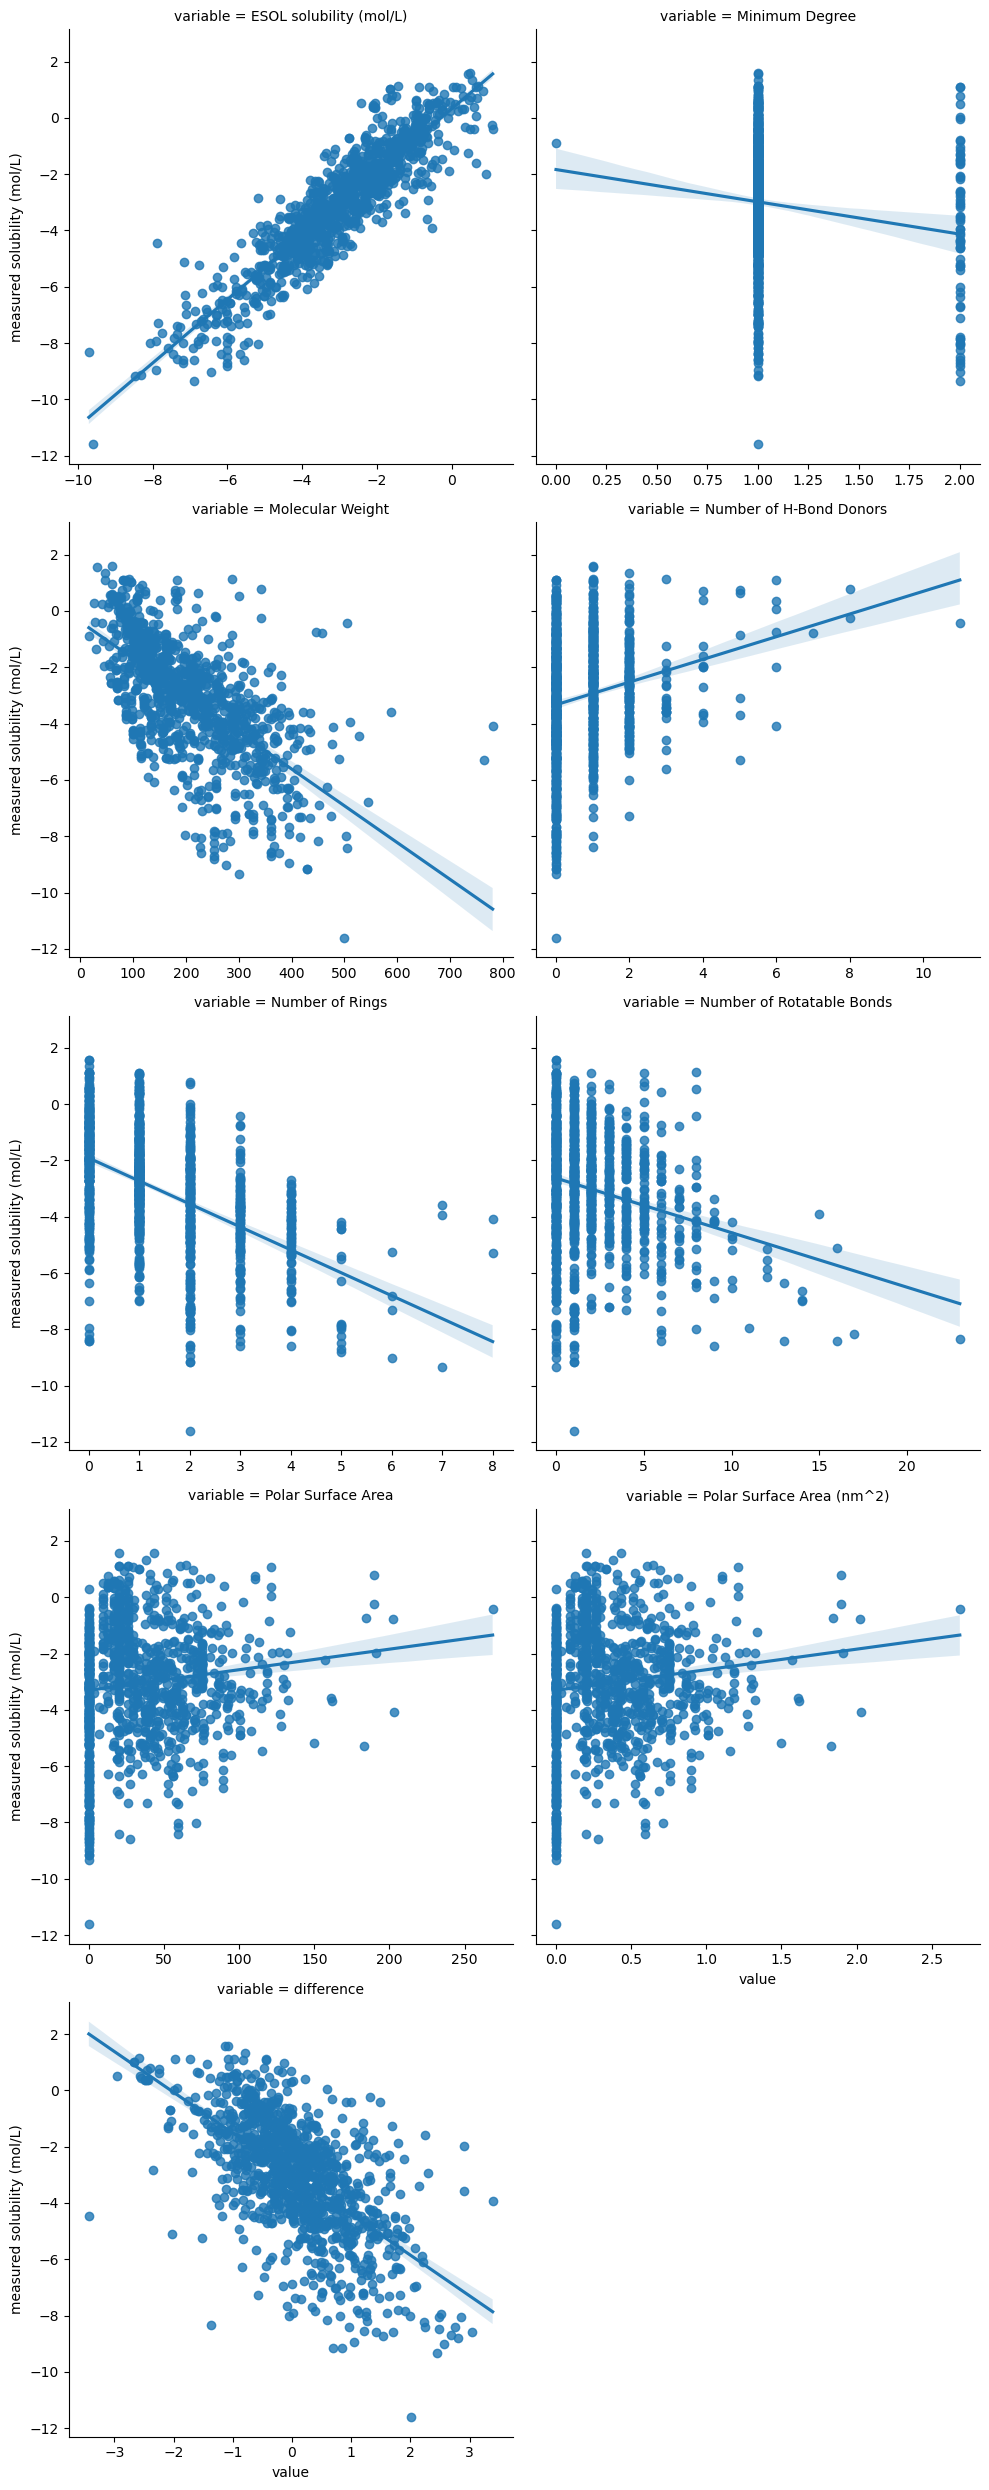

In [39]:
g = sns.lmplot(data=long_df, y="measured solubility (mol/L)", 
               x="value", col="variable", 
               col_wrap=2, facet_kws={"sharex": False})